In [189]:
from utils import showDisplay
import numpy as np
import matplotlib.pyplot as plt

# 1. Linearity of Expectations

In [190]:
showDisplay(1)

## **1.1 Introduction**

Linearity of expectations states that the expectation of the sum of random variables is equal to the sum of their individual expectations:

<IPython.core.display.Math object>

This property holds regardless of whether \( X \) and \( Y \) are independent.

For multiple random variables, it generalizes as:

<IPython.core.display.Math object>

## **1.2 Basic Derivation and Reasoning**

Using the definition of expectation:

<IPython.core.display.Math object>

This can be split into two integrals:

<IPython.core.display.Math object>

<IPython.core.display.Math object>

This holds because addition is distributive over integration.

## **1.3 Real-Life Use Cases**

1. **Finance:** Expected returns of a portfolio are the sum of expected returns from individual assets.

2. **Supply Chain Management:** The expected demand for a product across multiple regions is additive.

3. **Gaming:** Expected scores in a game with multiple rounds are additive across rounds.

In [191]:
dataset_size = 1000000
# Generate datasets from 6 named distributions
dataset1 = np.random.normal(50, 10, dataset_size)        # Normal distribution (mean=50, stddev=10)
dataset2 = np.random.poisson(7, dataset_size)            # Poisson distribution (lambda=7)
dataset3 = np.random.uniform(10, 20, dataset_size)       # Uniform distribution (range 10 to 20)
dataset4 = np.random.binomial(20, 0.5, dataset_size)     # Binomial distribution (n=20, p=0.5)
dataset5 = np.random.exponential(5, dataset_size)        # Exponential distribution (scale=5)
dataset6 = np.random.beta(2, 5, dataset_size) * 100      # Beta distribution (alpha=2, beta=5, scaled to 0-100)

# Calculate expectations
expectations = [
    ("Normal", np.mean(dataset1)),
    ("Poisson", np.mean(dataset2)),
    ("Uniform", np.mean(dataset3)),
    ("Binomial", np.mean(dataset4)),
    ("Exponential", np.mean(dataset5)),
    ("Beta", np.mean(dataset6)),
]

# Calculate combined expectations
datasets = [dataset1, dataset2, dataset3, dataset4, dataset5, dataset6]
combined_dataset = sum(datasets)
combined_expectation = np.mean(combined_dataset)
sum_of_individual_expectations = sum(exp[1] for exp in expectations)

# Print individual expectations
for name, expectation in expectations:
    print(f"E[{name}]: {expectation}")

# Print results for the sum
print(f"\nSum of individual expectations: {sum_of_individual_expectations}")
print(f"Expectation of the combined dataset (E[X1 + X2 + X3 + X4 + X5 + X6]): {combined_expectation}")


E[Normal]: 50.00212622959481
E[Poisson]: 6.999509
E[Uniform]: 14.999164056668693
E[Binomial]: 10.003622
E[Exponential]: 4.999988515918973
E[Beta]: 28.56243277237538

Sum of individual expectations: 115.56684257455785
Expectation of the combined dataset (E[X1 + X2 + X3 + X4 + X5 + X6]): 115.5668425745579


# 2. Linearity of Variance

In [192]:
showDisplay(2)

## **2.1 Introduction**

Variance measures the spread of a random variable. For independent random variables, the variance of their sum is the sum of their variances:

<IPython.core.display.Math object>

For multiple independent random variables:

<IPython.core.display.Math object>

## **2.2 Basic Derivation and Reasoning**

From the definition of variance:

<IPython.core.display.Math object>

Expanding \( (X + Y)^2 \):

<IPython.core.display.Math object>

For independent \( X \) and \( Y \), \( E[XY] = E[X]E[Y] \), so:

<IPython.core.display.Math object>

## **2.3 Real-Life Use Cases**

1. **Insurance:** Risk assessment by summing individual claim variances.

2. **Investment:** Combining variances of independent stock returns to calculate portfolio risk.

3. **Manufacturing:** Variance in dimensions of products assembled from independent components.

In [193]:
variances = [
    ("Normal", np.var(dataset1, ddof=1)),
    ("Poisson", np.var(dataset2, ddof=1)),
    ("Uniform", np.var(dataset3, ddof=1)),
    ("Binomial", np.var(dataset4, ddof=1)),
    ("Exponential", np.var(dataset5, ddof=1)),
    ("Beta", np.var(dataset6, ddof=1)),
]

# Calculate the variance of the sum of individual variances
sum_of_variances = sum(var[1] for var in variances)

# Calculate combined dataset
combined_dataset = dataset1 + dataset2 + dataset3 + dataset4 + dataset5 + dataset6
variance_sum = np.var(combined_dataset, ddof=1)

# Print individual variances
for name, variance in variances:
    print(f"Var[{name}]: {variance}")

# Print results for the sum
print(f"\nSum of individual variances: {sum_of_variances}")
print(f"Variance of the combined dataset (Var[X1 + X2 + X3 + X4 + X5 + X6]): {variance_sum}")


Var[Normal]: 100.04596941928538
Var[Poisson]: 6.996699755618754
Var[Uniform]: 8.344329736322862
Var[Binomial]: 4.992779873895873
Var[Exponential]: 25.067248693122544
Var[Beta]: 255.72543439976917

Sum of individual variances: 401.1724618780146
Variance of the combined dataset (Var[X1 + X2 + X3 + X4 + X5 + X6]): 401.83792015995135


# 3. Markov's Inequality

In [194]:
showDisplay(3)

## **3.1 Introduction**

Markov's inequality provides an upper bound on the probability that a non-negative random variable exceeds a certain value:

<IPython.core.display.Math object>

## **3.2 Basic Derivation and Reasoning**

From the definition of expectation:

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Rearranging gives:

<IPython.core.display.Math object>

## **3.3 Real-Life Use Cases**

1. **Queuing Theory:** Bounding waiting times in service systems.

2. **Network Traffic:** Estimating probability of high data loads.

3. **Project Management:** Bounding budget or schedule overruns.

In [195]:
# Generate a non-negative dataset
dataset = np.random.beta(2, 5, dataset_size) * 100

# Define values of a
a_values = np.linspace(1, 30, 15)  # Range of a values from 1 to 30, 1st arg is start, 2nd is end, 3rd is number of values
probabilities = []
bounds = []

# Calculate probabilities and bounds for each value of a
for a in a_values:
    prob_experimental = np.mean(dataset >= a)
    bound = np.mean(dataset) / a

    probabilities.append(prob_experimental)
    bounds.append(bound)
# Print results
for a, prob, bound in zip(a_values, probabilities, bounds):
    print(f"For a = {a:.2f}: P(X >= {a}) = {prob:.4f}, Markov bound = {bound:.4f}")


For a = 1.00: P(X >= 1.0) = 0.9985, Markov bound = 28.5839
For a = 3.07: P(X >= 3.0714285714285716) = 0.9869, Markov bound = 9.3064
For a = 5.14: P(X >= 5.142857142857143) = 0.9652, Markov bound = 5.5580
For a = 7.21: P(X >= 7.214285714285715) = 0.9355, Markov bound = 3.9621
For a = 9.29: P(X >= 9.285714285714286) = 0.8991, Markov bound = 3.0783
For a = 11.36: P(X >= 11.357142857142858) = 0.8575, Markov bound = 2.5168
For a = 13.43: P(X >= 13.42857142857143) = 0.8120, Markov bound = 2.1286
For a = 15.50: P(X >= 15.500000000000002) = 0.7637, Markov bound = 1.8441
For a = 17.57: P(X >= 17.571428571428573) = 0.7143, Markov bound = 1.6267
For a = 19.64: P(X >= 19.642857142857146) = 0.6638, Markov bound = 1.4552
For a = 21.71: P(X >= 21.714285714285715) = 0.6133, Markov bound = 1.3164
For a = 23.79: P(X >= 23.78571428571429) = 0.5631, Markov bound = 1.2017
For a = 25.86: P(X >= 25.85714285714286) = 0.5136, Markov bound = 1.1055
For a = 27.93: P(X >= 27.92857142857143) = 0.4662, Markov bound

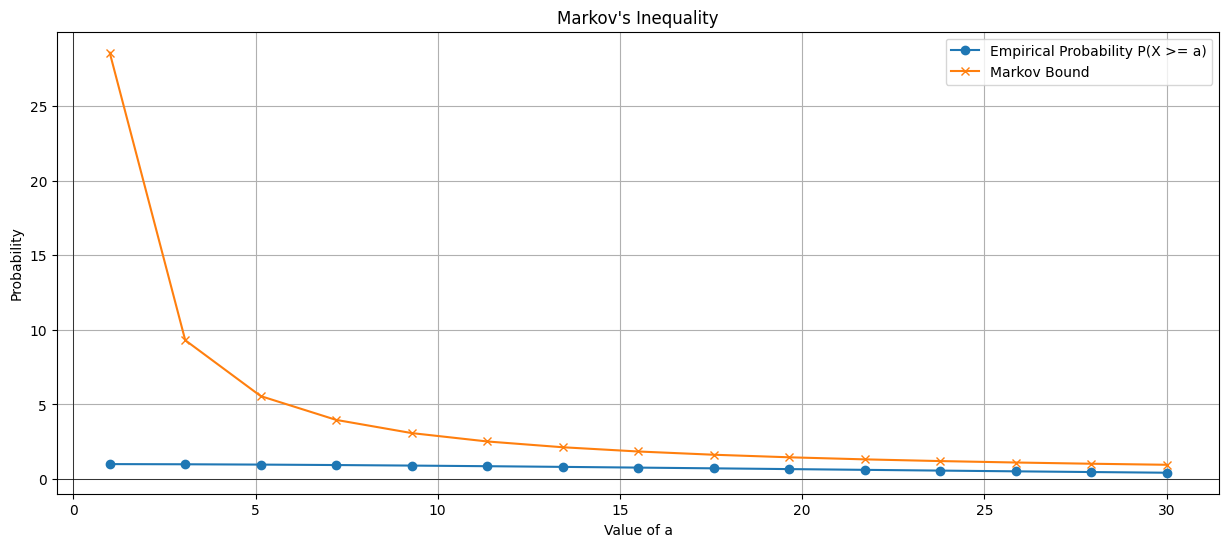

In [196]:
# Plotting the results
plt.figure(figsize=(15, 6))
plt.plot(a_values, probabilities, label='Empirical Probability P(X >= a)', marker='o')
plt.plot(a_values, bounds, label='Markov Bound', marker='x')
plt.title("Markov's Inequality")
plt.xlabel("Value of a")
plt.ylabel("Probability")
plt.legend()
plt.grid()
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.show()

# 4. Chebyshev's Inequality

In [197]:
showDisplay(4)

## **4.1 Introduction**

Chebyshev's inequality provides a bound on the probability that a random variable deviates from its mean by more than \( k \) standard deviations:

<IPython.core.display.Math object>

This inequality applies to any random variable with finite variance, regardless of its distribution.

## **4.2 Basic Derivation and Reasoning**

From Markov's inequality:

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## **4.3 Real-Life Use Cases**

1. **Quality Control:** Ensuring products meet tolerance limits by bounding probabilities of extreme deviations.

2. **Weather Prediction:** Estimating probabilities of extreme temperature deviations.

3. **Risk Management:** Bounding the probability of significant financial losses in markets.

In [208]:
# Generate a non-negative dataset
np.random.seed(0)  # For reproducibility
dataset = np.random.exponential(scale=5, size=1000)

# Calculate mean and standard deviation
mean = np.mean(dataset)
std_dev = np.std(dataset)

# Define values of k for which to calculate probabilities and bounds
k_values = np.arange(1, 6, 0.5)  # Range of k values from 1 to 5
probabilities = []
bounds = []

# Calculate probabilities and bounds for each value of k
for k in k_values:
    prob_experimental = np.mean(np.abs(dataset - mean) >= k * std_dev)
    bound = 1 / (k ** 2)

    probabilities.append(prob_experimental)
    bounds.append(bound)

# Print results
for k, prob, bound in zip(k_values, probabilities, bounds):
    print(f"For k = {k:.1f}: P(|X - E[X]| >= {k}*std) = {prob:.4f}, Chebyshev bound = {bound:.4f}")

For k = 1.0: P(|X - E[X]| >= 1.0*std) = 0.1450, Chebyshev bound = 1.0000
For k = 1.5: P(|X - E[X]| >= 1.5*std) = 0.0920, Chebyshev bound = 0.4444
For k = 2.0: P(|X - E[X]| >= 2.0*std) = 0.0520, Chebyshev bound = 0.2500
For k = 2.5: P(|X - E[X]| >= 2.5*std) = 0.0290, Chebyshev bound = 0.1600
For k = 3.0: P(|X - E[X]| >= 3.0*std) = 0.0140, Chebyshev bound = 0.1111
For k = 3.5: P(|X - E[X]| >= 3.5*std) = 0.0090, Chebyshev bound = 0.0816
For k = 4.0: P(|X - E[X]| >= 4.0*std) = 0.0050, Chebyshev bound = 0.0625
For k = 4.5: P(|X - E[X]| >= 4.5*std) = 0.0040, Chebyshev bound = 0.0494
For k = 5.0: P(|X - E[X]| >= 5.0*std) = 0.0040, Chebyshev bound = 0.0400
For k = 5.5: P(|X - E[X]| >= 5.5*std) = 0.0030, Chebyshev bound = 0.0331


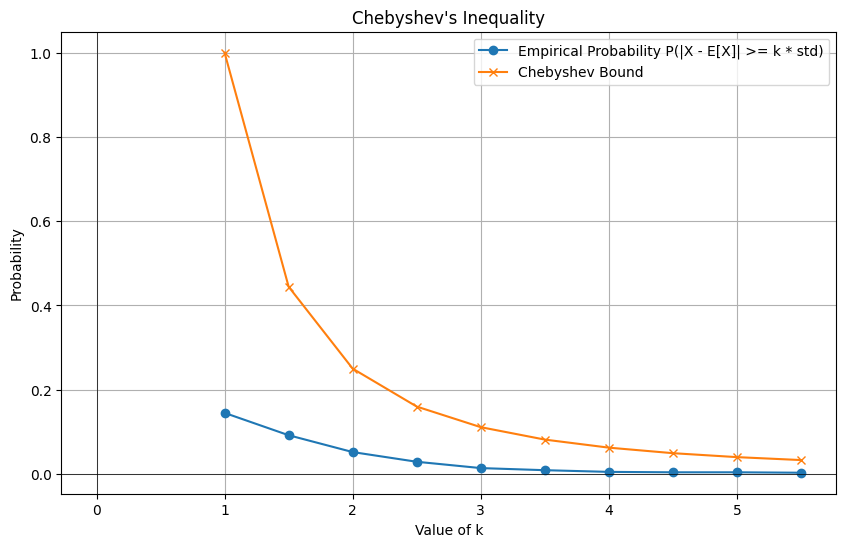

In [209]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, probabilities, label='Empirical Probability P(|X - E[X]| >= k * std)', marker='o')
plt.plot(k_values, bounds, label='Chebyshev Bound', marker='x')
plt.title("Chebyshev's Inequality")
plt.xlabel("Value of k")
plt.ylabel("Probability")
plt.legend()
plt.grid()
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.show()


# 5. Weak Law of Large Numbers

In [210]:
showDisplay(5)

## **5.1 Introduction**

The Weak Law of Large Numbers (WLLN) states that the sample average of independent, identically distributed (i.i.d.) random variables converges in probability to the population mean as the sample size grows:

<IPython.core.display.Math object>

This is a foundational result in probability and statistics, ensuring the reliability of sample means.

## **5.2 Basic Derivation and Reasoning**

From Chebyshev's inequality:

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Substituting this into Chebyshev's inequality:

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## **5.3 Real-Life Use Cases**

1. **Polls and Surveys:** Ensures sample means approximate population means in large surveys.

2. **Manufacturing:** Averages of large production runs stabilize, reducing variability.

3. **Gambling:** Explains how casinos profit due to the law of averages.

In [211]:
# Define sample sizes and true mean
sample_sizes = [10, 100, 1000, 10000]
true_mean = 3.5  # Mean of a fair six-sided die

# Calculate and print sample means for different sample sizes
for size in sample_sizes:
    sample = np.random.randint(1, 7, size)  # Generate a sample from a fair die
    sample_mean = np.mean(sample)
    print(f"Sample size: {size}, Sample mean: {sample_mean:.4f}, True mean: {true_mean:.4f}")

# Generate and plot sample means for larger sample sizes
num_samples = 1000  # Number of samples to average
sample_means = [np.mean(np.random.randint(1, 7, size)) for size in range(1, num_samples + 1)]

Sample size: 10, Sample mean: 4.3000, True mean: 3.5000
Sample size: 100, Sample mean: 3.3000, True mean: 3.5000
Sample size: 1000, Sample mean: 3.5600, True mean: 3.5000
Sample size: 10000, Sample mean: 3.4793, True mean: 3.5000


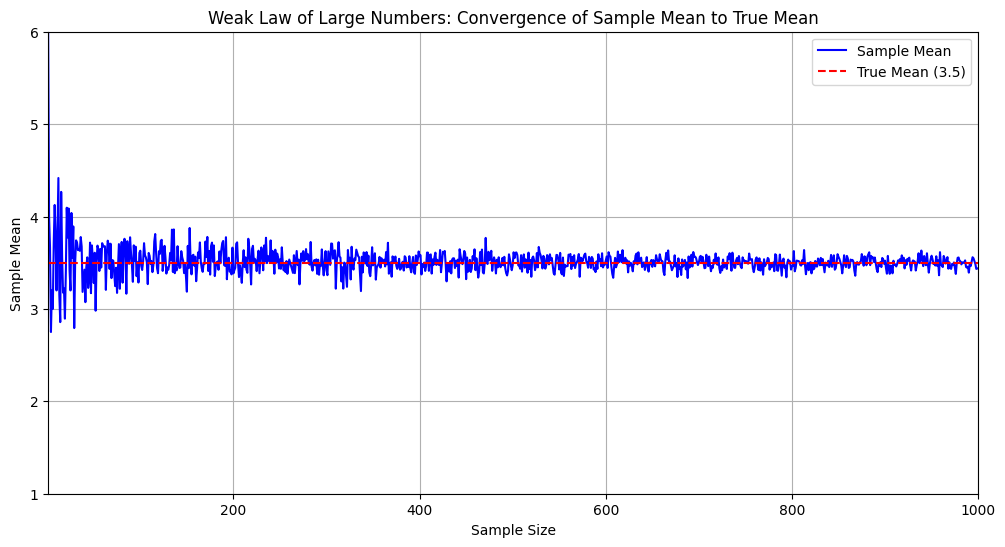

In [212]:
# Plot the sample means
plt.figure(figsize=(12, 6))
plt.plot(range(1, num_samples + 1), sample_means, label='Sample Mean', color='blue')
plt.axhline(y=true_mean, color='red', linestyle='--', label='True Mean (3.5)')
plt.xlabel('Sample Size')
plt.ylabel('Sample Mean')
plt.title('Weak Law of Large Numbers: Convergence of Sample Mean to True Mean')
plt.legend()
plt.grid()
plt.xlim(1, num_samples)
plt.ylim(1, 6)
plt.show()
